In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime
import warnings
warnings.filterwarnings('ignore')


C:\Users\ramsu\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Q1: Try out the ‘Big Moves Monday’ strategy on the above data with the standard conditions as taught in the class. Now back-test the strategy again but this time tweak one of the conditions such that the ‘ibs’ value must be lower than 0.8. Compare the results(total return) with the standard conditions case. Comment on the results.


1. Calculate the 25-day average of `relative_range = (High - Low) / Close` and call it `rel_range_ma`.
2. The Monday `Close` must be lower than the previous Friday `Close` by at least 0.25 times of `rel_range_ma`. 
3. Create a variable `ibs = (Close - Low) / (High - Low)`. It must be lower than 0.3.
4. If conditions in 2, 3 and 4 are met, go long on Monday `Close`.
5. Square off your position on Friday `Close`.

In [6]:
# creating a function which can import data .
def get_data_fixed (tck_name,start:datetime.datetime = 0 ,end:datetime.datetime=0):
    if start & end == False:
        start = datetime.date(2015,1,2)
        end = datetime.date(2020,4,30)
    
    data = yf.download(tck_name,start,end)
    
    return data

def get_data(tck_name,time):
    """Import the data of a ticker from one start to end """ 
    start = datetime.datetime.now().date()-datetime.timedelta(days=time)
    end = datetime.datetime.now().date()
    
    data = yf.download(tck_name,start,end)
    
    return data

def indicators(data):
    """Computing the Indicators such as rel range 
        Lower wick size in whole candle 
        Relative moving average of relative range """
    data["rel_range"]=(data.High - data.Low)/data['Adj Close']
    
    data ["rel_ma"] = data["rel_range"].rolling(window=25).mean()
    
    data["ibs"] = (data.Close-data.Low)/(data.High-data.Low)
    
    data["day"] =data.index.strftime("%A")
    
    data["cc_returns"] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
     
    return data
def rules(data):
    """ Computing the Conditions for strategies such as 
        1. Calculate the 25-day average of `relative_range = (High - Low) / Close` and call it `rel_range_ma`.
        2. The Monday `Close` must be lower than the previous Friday `Close` by at least 0.25 times of `rel_range_ma`. 
        3. Create a variable `ibs = (Close - Low) / (High - Low)`. It must be lower than 0.3.
        4. If conditions in 2, 3 are met, go long on Monday `Close`. """
    
    data["con1"] = np.where((data["day"]=="Monday") & (data["day"].shift(1) == "Friday") & (data["day"].shift(-4) == "Friday") \
                            & (1-data['Adj Close']/ data['Adj Close'].shift(1) > 0.25 * data["rel_ma"]) ,1,0)

    data["con2"] = np.where((data["ibs"] < 0.8 ) ,1,0 )
    
    data["signal"] = np.where( data["con1"] & data["con2"],1,0 ) 
    
    data.signal = data.signal.shift(1)
    
    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)
    
    data['strategy_returns'] = data['position'] * data['cc_returns']
    
    return data

[*********************100%***********************]  1 of 1 completed
Buy and hold returns:144.41%
Strategy returns:68.61%


,Open,High,Low,Close,Adj Close,Volume,rel_range,rel_ma,ibs,day,cc_returns,con1,con2,signal,position,strategy_returns
Date,,,,,,,,,,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.748566,27913900,0.021079,NaN,0.249998,Friday,NaN,0,1,NaN,NaN,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.364658,39673900,0.011604,NaN,0.166671,Monday,-0.009238,0,1,0.0,NaN,NaN
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.757530,36447900,0.029688,NaN,0.090910,Tuesday,-0.024024,0,1,0.0,NaN,NaN
2015-01-07,45.980000,46.459999,45.490002,46.230000,41.275364,29114100,0.023501,NaN,0.762886,Wednesday,-0.011399,0,1,0.0,NaN,NaN
2015-01-08,46.750000,47.750000,46.720001,47.590000,42.489609,29645200,0.024241,NaN,0.844660,Thursday,0.017594,0,0,0.0,0.0,0.0
2015-01-09,47.610001,47.820000,46.900002,47.189999,42.132477,23944200,0.021836,NaN,0.315215,Friday,0.009154,0,1,0.0,0.0,0.0
2015-01-12,47.419998,47.540001,46.360001,46.599998,41.605709,23651900,0.028361,NaN,0.203388,Monday,-0.003428,0,1,0.0,0.0,0.0
2015-01-13,46.970001,47.910000,46.060001,46.360001,41.391430,35270600,0.044695,NaN,0.162162,Tuesday,-0.008591,0,1,0.0,0.0,0.0
2015-01-14,45.959999,46.240002,45.619999,45.959999,41.034302,29719600,0.015109,NaN,0.548385,Wednesday,-0.017257,0,1,0.0,0.0,0.0


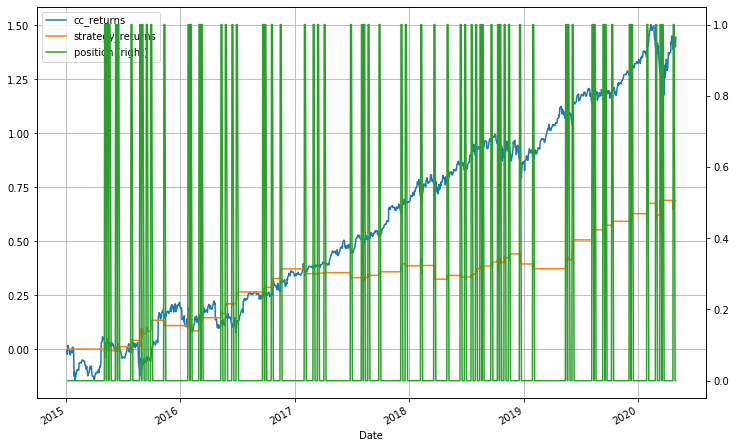

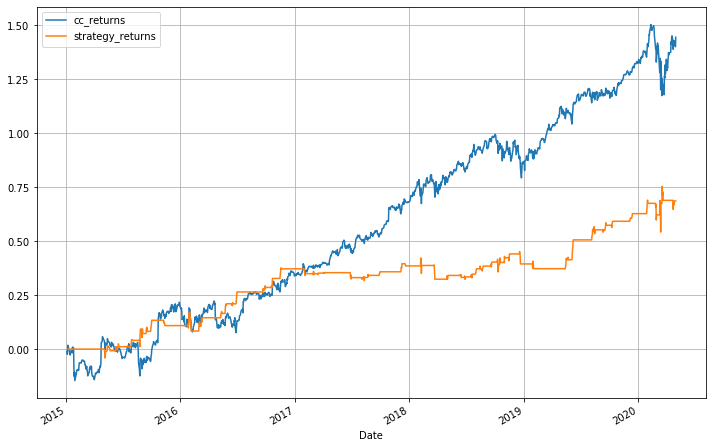

In [8]:
df=get_data_fixed("MSFT")
# creating a function to compute indicators 

df1 = df.copy()

df1 = indicators(df1)
df1 = rules(df1)
df2 = df1.copy()
df1.tail(50)

def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns:{}%'.format(np.round(data['cc_returns'].cumsum()[-1] * 100, 2)))
    print('Strategy returns:{}%'.format(np.round(data['strategy_returns'].cumsum()[-1] * 100, 2)) )
    
    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    data[['cc_returns', 'strategy_returns', 'position']].plot(
        secondary_y='position', grid=True, figsize=(12, 8))
    
    data[['cc_returns', 'strategy_returns']].plot(
         grid=True, figsize=(12, 8))


show_backtesting_results(df1)
df1.head(50)

# df1.to_csv(r"C:\Users\ramsu\ltphd\lecture-python-programming.notebooks\quantinsti\DMP-01-Assignment\test1.csv")


Start date,2015-01-02
End date,2020-04-29
Total months,63
,Backtest
Annual return,12.5%
Cumulative returns,87.3%
Annual volatility,14.9%
Sharpe ratio,0.87
Calmar ratio,0.85
Stability,0.87
Max drawdown,-14.8%


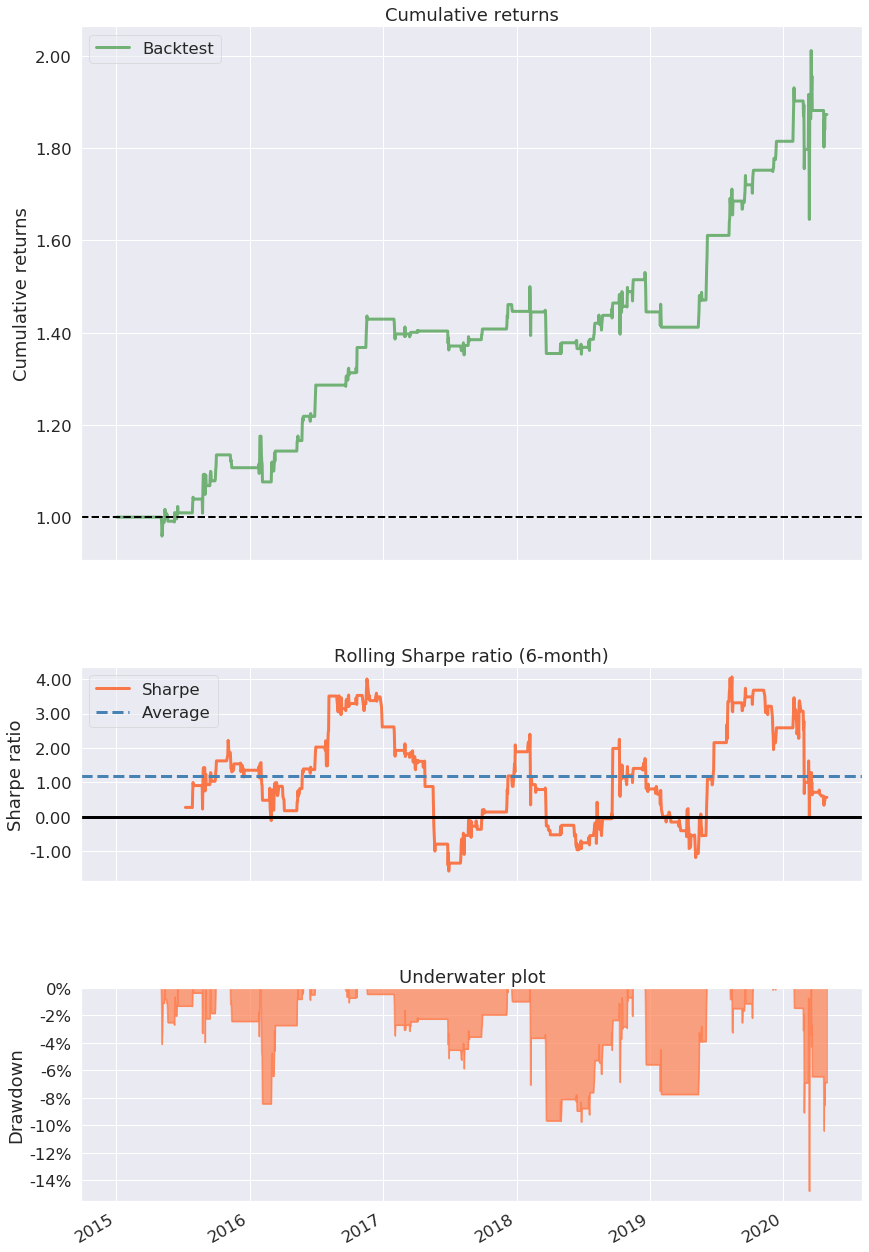

In [4]:
import pyfolio as pf
pf.create_simple_tear_sheet(df2['strategy_returns'], benchmark_rets=None)
# pf.create_full_tear_sheet(df2['cc_returns'])

### Question 2
---
> Q2: You have seen a strategy based on MACD indicator in the class. Now back-test the following
strategy based on Bollinger bands:<br>
    (i) Create 20-day (+/- 2 standard deviations) Bollinger bands on the adjusted close
price for the above equity<br>
    (ii) Buy when the price crosses the lower band from top and hold until the price
crosses the upper band from below the next time.<br>
    (iii) Sell when the price crosses the upper band from below and hold until the price
crosses the lower band from top the next time.<br>
    (iv) Once we get into a trade, we always have an open position at all times.<br>
Compare the total returns of the above strategy with a simple ‘buy & hold’ strategy. Comment on
your findings. <br>
---

In [5]:
def indicators_2(dt):
    
    """ calculating the upper and lower bollinger bands"""
    
    dt["ma"] = dt["Adj Close"].rolling(window=20).mean()
    
    dt["std"] = dt["Adj Close"].rolling(window=20).std()
    
    dt["upper_bl"] = dt["ma"] + 2 * dt["std"]
    
    dt["lower_bl"] = dt["ma"] - 2 * dt["std"] 
    
    dt["cc_returns"] = np.log(dt["Adj Close"]/dt["Adj Close"].shift(1))
    
    return dt

def strategy_2(dt):
    # Sell = -1 and Buy =1
    dt['signal'] = np.where(dt["Adj Close"] > dt["upper_bl"] ,-1,np.where(dt["Adj Close"] < dt["lower_bl"],1,0))
    
    dt['signal'] = dt['signal'].shift(1)
    
    dt['position'] = dt['signal'].replace(to_replace=0,method ='ffill')
    
    dt['strategy_returns'] = dt['cc_returns'] * dt['position']
    
    return dt


Buy and hold returns:144.41%
Strategy returns:37.12%


-1.0    805
 1.0    515
Name: position, dtype: int64

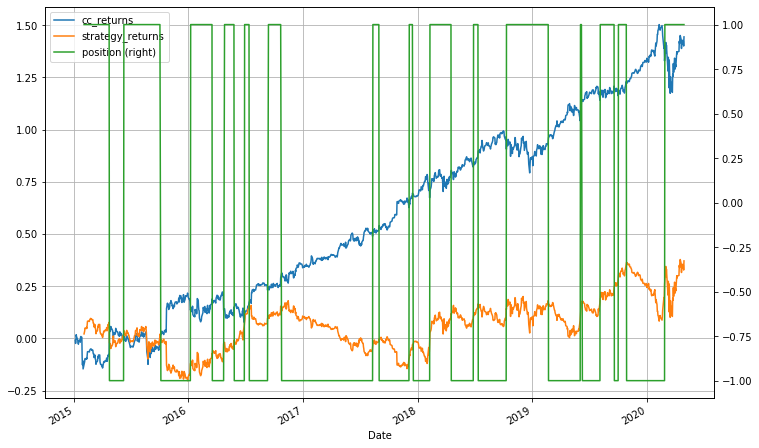

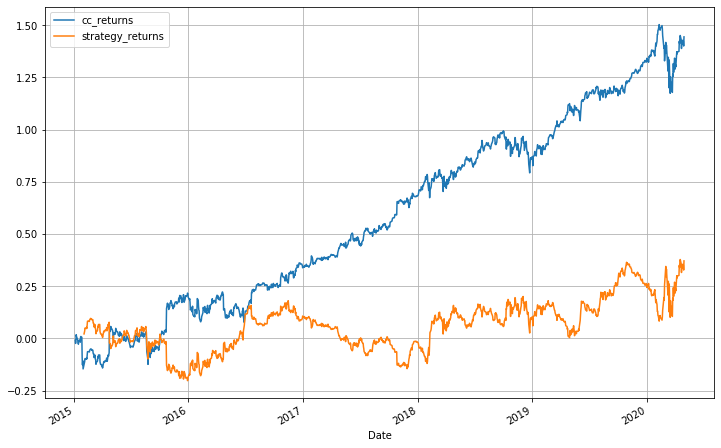

In [6]:
df3 = df.copy()
indicators_2(df3)
strategy_2(df3)
df3.head(50)
# import os
df3.to_csv(r"C:\Users\ramsu\ltphd\lecture-python-programming.notebooks\quantinsti\DMP-01-Assignment\test2.csv")

show_backtesting_results(df3)
df3['position'].value_counts()

---
> Q3: Write a customized function that computes returns for the exponential moving average (EMA) strategy (discussed in class) for different windows(spans). Find the optimal value of span between 1 and 30 which produces the best overall total return?

---

In [7]:
def indicators_3(data,period):
    
    data["ema"] = data["Adj Close"].ewm(span=period ,adjust = False).mean()
    
    return data
def buy_hold_return(data):
    """ Calculates the daily logerithemic returns """
    
    data["cc_returns"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))
    
    return data


def strategy_3(data):
    data["position"] = np.where(data["Adj Close"] > data["ema"] ,1,0)
    
    data["position"] =data["position"].shift(1)
    
    data["strategy_returns"] = data["position"] * data["cc_returns"]
    
    return data

def back_test_3(data):
    max_dict ={}
    for i in range(1,31):
        indicators_3(data,i)
        buy_hold_return(data)
        strategy_3(data)
        max_dict[f"span{i}"] = np.round(data["strategy_returns"].cumsum()[-1],2)
        
    return max_dict
    

Hence max profit is attained at :  span14 and the profit is 43.0%
Buy and hold returns:144.41%
Strategy returns:21.79%


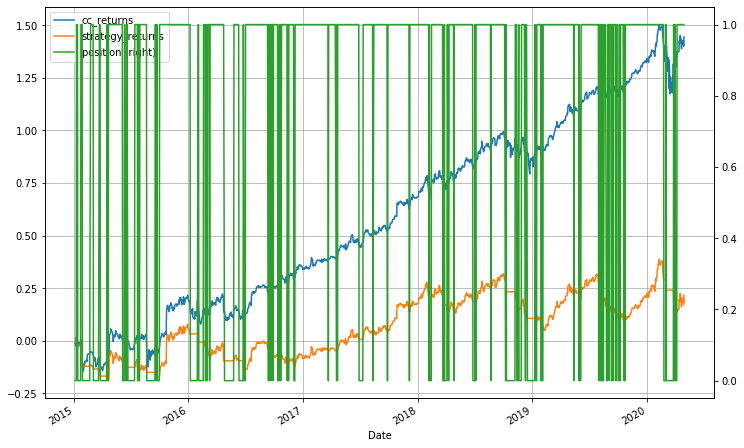

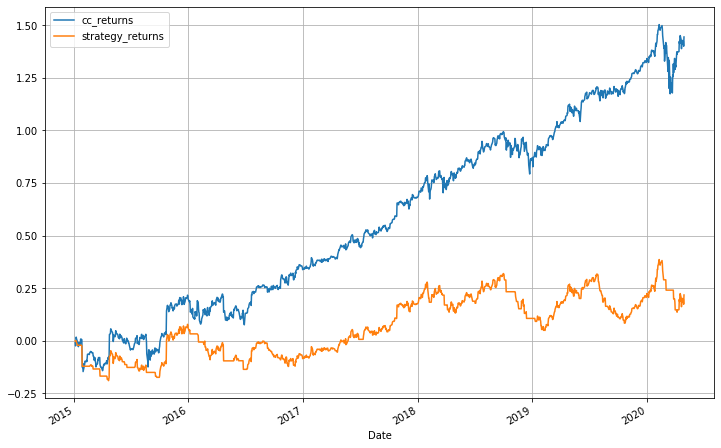

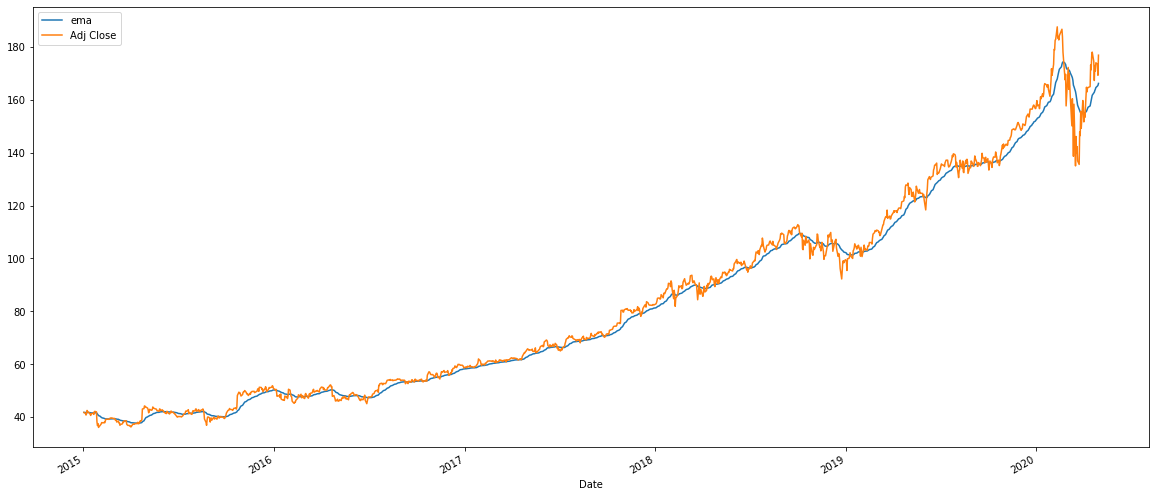

In [8]:

dfs3 = df.copy()

my_dict ={}
my_dict = back_test_3(dfs3)
maxvalue = max(my_dict.values())

def key_max(my_dict,maxvalue):
    
    for i,j in my_dict.items():

        if j == maxvalue:
            return i 
       
print("Hence max profit is attained at : ",key_max(my_dict,maxvalue),f"and the profit is {maxvalue*100}%")  



show_backtesting_results(dfs3)



dfs3.tail(50)

dfs3[["ema","Adj Close"]].plot(figsize =(20,9))

---

> Q4: The moving average crossover (MAC) code is implemented where we always have an open position. Calculate returns where short selling is not allowed. Plot a graph comparing returns from buy-and-hold, no short selling, and the one we did in class. Comment on your results.

---

In [9]:
def indicators_4(df3):
    
    m = 50 # defining the shorter lookback period
    n = 200 # defining the longer lookback period

    df3['sma50'] = df3['Adj Close'].rolling(window=m, center=False).mean()
    df3['sma200'] = df3['Adj Close'].rolling(window=n, center=False).mean()

    df3[['Adj Close', 'sma50', 'sma200']].plot(grid=True, linewidth=0.5, figsize=(12, 8))

    df3['sma50_prev_day'] = df3['sma50'].shift(1)
    df3['sma200_prev_day'] = df3['sma200'].shift(1)
    
    return df3


def strategy_4(df3,L_S):
    
    df3['signal'] = np.where((df3['sma50'] > df3['sma200']) 
                                & (df3['sma50_prev_day'] < df3['sma200_prev_day']), 1, 0)
    df3['signal'] = np.where((df3['sma50'] < df3['sma200']) 
                                & (df3['sma50_prev_day'] > df3['sma200_prev_day']), -1, df3['signal'])
        
    if (L_S == 'Long_Short'):
        
        df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')
        
        df3['position'] = df3['position'].shift(1)
        
        df3["strategy_returns"] = df3["cc_returns"] * df3['position']
        
        return df3
    else :
        
        df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')
        
        df3['position'] = df3['position'].replace(value=0, to_replace = -1 , method ='pad' )
        
        df3['position'] = df3['position'].shift(1)
        
        df3["strategy_returns"] = df3["cc_returns"] * df3['position'] 
        return df3



Buy and hold returns:144.41%
Strategy returns:100.47%
 1.0    926
 0.0    374
-1.0     39
Name: position, dtype: int64


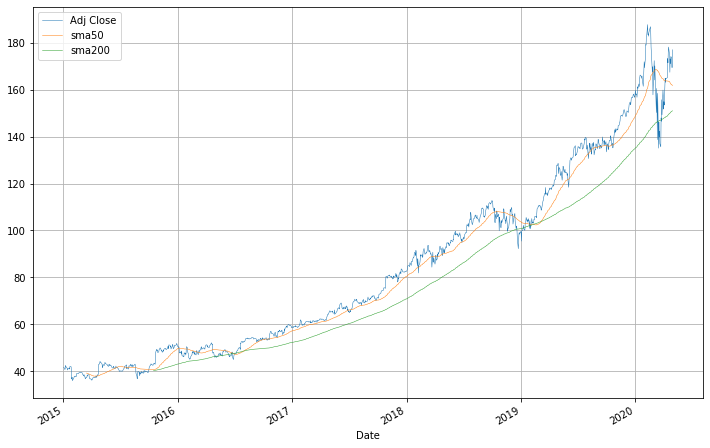

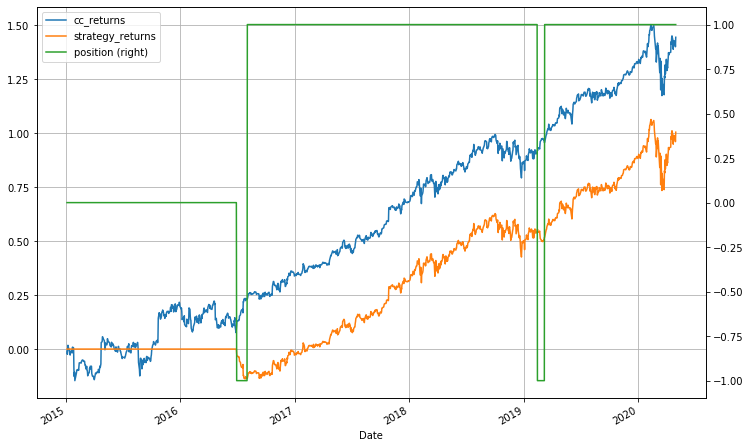

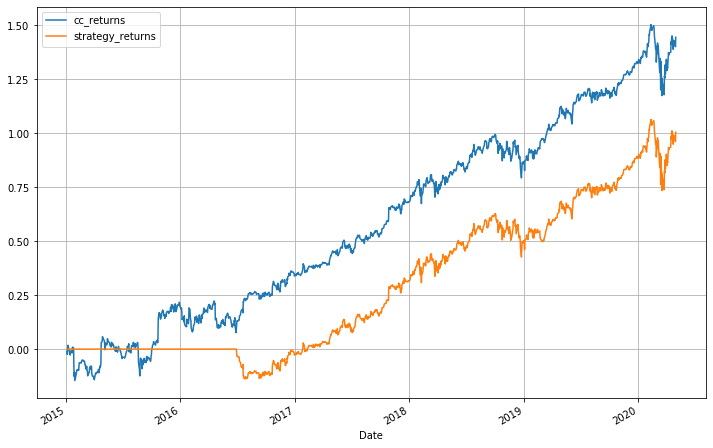

In [10]:
# strategy returns for long short
dfs4 = df.copy()

indicators_4(dfs4)
buy_hold_return(dfs4)
strategy_4(dfs4,"Long_Short")
show_backtesting_results(dfs4)
print(dfs4["position"].value_counts())

Buy and hold returns:144.41%
Strategy returns:117.6%
1.0    926
0.0    413
Name: position, dtype: int64


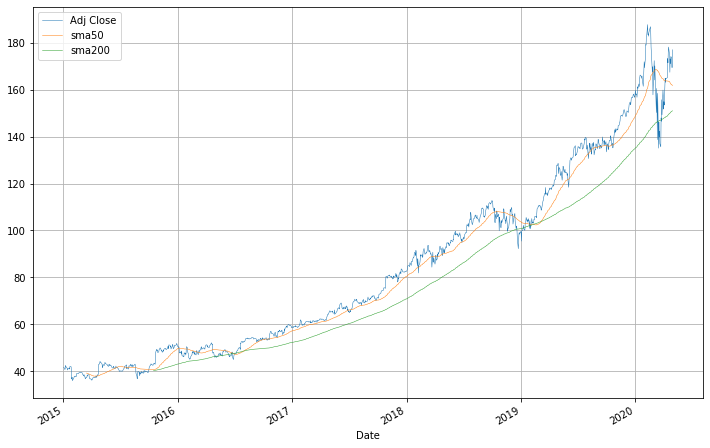

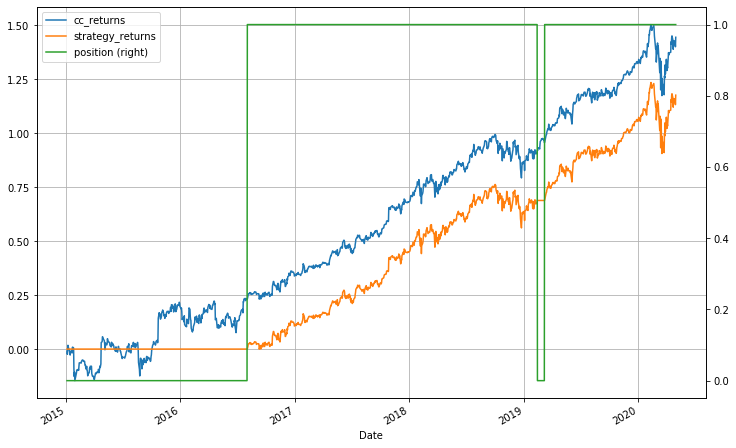

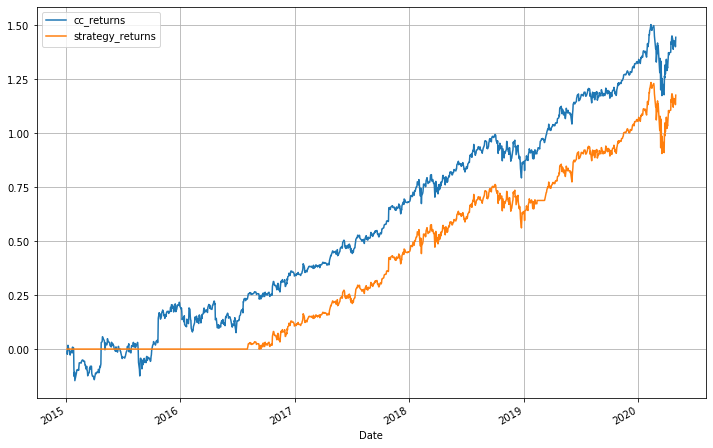

In [11]:
indicators_4(dfs4)
buy_hold_return(dfs4)
strategy_4(dfs4,"Long")
show_backtesting_results(dfs4)
print(dfs4["position"].value_counts())

---
#### ANS:
    The Long short return of MAC Cross over is : Strategy returns:100.47 %
    
    The Long only return of MAC Cross Over is :  Strategy returns:117.6%
    
    The Buy only retuns of MAC Cross over is :   Buy and hold returns:144.41%
    
    
`this observation is generally observed as the traditional Moving average crossovers show delay in entry and exit`

---
Q5: Download the data for the following companies TSLA, NFLX, AMZN, GOOG and CVX using the code for automatically downloading multiple stocks from January 1st 2015 to April 30th 2020. You can use Yahoo Finance for downloading the data.

In [12]:
import os 


In [13]:
from concurrent import futures

def download_stocks(stock):
    try:
        print('Trying to retrieve the %s symbol...\n' % (stock))
        stock_df = web.DataReader(stock, 'yahoo', start, end)
        stock_df['Name'] = stock
        stock_df = pd.DataFrame(stock_df,columns =["Name","High","Low","Open","Close","Adj Close"])
        output_name = r"C:\Users\ramsu\ltphd\lecture-python-programming.notebooks\quantinsti\DMP-01-Assignment\DMP-01_DATA"+"\\"+stock+'.csv'
        list_stocks.append(output_name)
        stock_df.to_csv(output_name)
        print('Symbol %s downloaded OK.\n' % (stock))
    except:
        bad_tickers.append(stock)
        print('Problems downloading the %s symbol.\n' % (stock))

stocksList = ['TSLA','NFLX','AMZN','GOOG','CVX']
list_stocks = []

### Keeping track of failed ticker download queries
bad_tickers = []

end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 10)

max_workers = 50

workers = min(max_workers, len(stocksList)) 
### In case a smaller number of stocks than threads was passed in
with futures.ThreadPoolExecutor(workers) as executor:
    res = executor.map(download_stocks, stocksList)

Trying to retrieve the TSLA symbol...

Trying to retrieve the NFLX symbol...

Trying to retrieve the AMZN symbol...

Trying to retrieve the GOOG symbol...

Trying to retrieve the CVX symbol...

Symbol NFLX downloaded OK.

Symbol AMZN downloaded OK.

Symbol GOOG downloaded OK.

Symbol TSLA downloaded OK.

Symbol CVX downloaded OK.



In [14]:
print('Trying to retrieve the %s symbol...\n' % ('TSLA'))
stock_df = web.DataReader('TSLA', 'yahoo', start, end)
stock_df['Name'] = 'TSLA'
output_name = r"C:\Users\ramsu\ltphd\lecture-python-programming.notebooks\quantinsti\DMP-01-Assignment\DMP-01_DATA"+"\\"+'TSLA' +'.csv'
list_stocks.append(output_name)
stock_df.to_csv(output_name)
print('Symbol TSLA downloaded OK.\n' )

Trying to retrieve the TSLA symbol...

Symbol TSLA downloaded OK.

